学习使用R语言进行样条回归。

# 线性样条

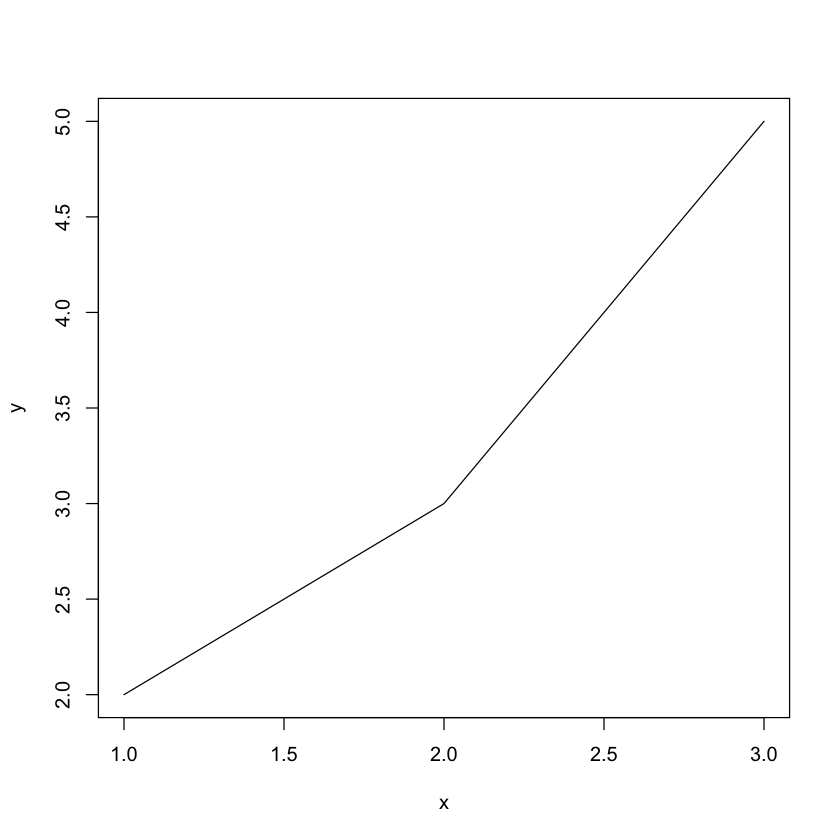

In [3]:
# 输入数据
x <- c(1, 2, 3)
y <- c(2, 3, 5)

# 线性样条
plot(x, y, type = "l")

# 多项式样条

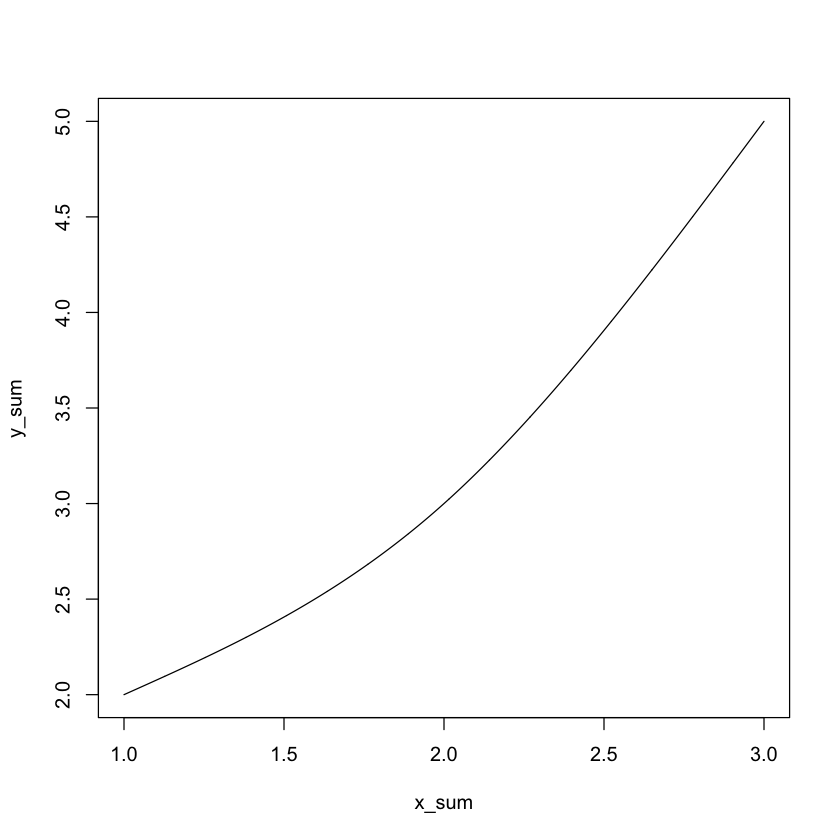

In [8]:
x0 <- seq(1, 2, 0.001)
y0 <- 2 + 0.75 * (x0 - 1) + 0.25 * (x0 - 1)^3

x1 <- seq(2, 3, 0.001)
y1 <- 3 + 1.5 * (x1 - 2) + 0.75 * (x1 - 2)^2 - 0.25 * (x1 - 2)^3

x_sum <- c(x0, x1)
y_sum <- c(y0, y1)

plot(x_sum, y_sum, type = "l")

# B样条

In [9]:
# 安装必要的包
install.packages("splines")
install.packages("mgcv")

Warning message:
"package 'splines' is a base package, and should not be updated"



The downloaded binary packages are in
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//RtmpDIItyb/downloaded_packages


In [10]:
# 加载包
library(splines)
library(mgcv)
library(ggplot2)

Loading required package: nlme

This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.



In [11]:
# 合成数据
set.seed(123)
x <- seq(0, 10, length.out = 100)
y <- sin(x) + 0.5 * rnorm(100)  # 生成含噪声的正弦数据
data <- data.frame(x, y)
data

x,y
<dbl>,<dbl>
0.0000000,-0.280237823
0.1010101,-0.014250324
0.2020202,0.980003014
0.3030303,0.333668000
0.4040404,0.457780480
0.5050505,1.341384134
0.6060606,0.800092210
0.7070707,0.017078896
0.8080808,0.379536136


In [14]:
# 指定自由度（df = 节点数 + 次数）
basis_auto <- bs(data$x, df = 6, degree = 3)  # 自动选择节点

basis_auto

1,2,3,4,5,6
0.0000000,0.000000000,0.000000e+00,0.000000e+00,0,0
0.1139814,0.002388267,1.099317e-05,0.000000e+00,0,0
0.2139629,0.009311219,8.794540e-05,0.000000e+00,0,0
0.3006372,0.020406081,2.968157e-04,0.000000e+00,0,0
0.3746969,0.035310078,7.035632e-04,0.000000e+00,0,0
0.4368344,0.053660435,1.374147e-03,0.000000e+00,0,0
0.4877424,0.075094378,2.374526e-03,0.000000e+00,0,0
0.5281135,0.099249132,3.770659e-03,0.000000e+00,0,0
0.5586402,0.125761921,5.628506e-03,0.000000e+00,0,0
0.5800150,0.154269972,8.014025e-03,0.000000e+00,0,0


In [15]:
# 将基矩阵作为预测变量
model <- lm(y ~ basis, data = data)
# 查看模型摘要
summary(model)


Call:
lm(formula = y ~ basis, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.95330 -0.31246 -0.07955  0.30434  1.24654 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.5652441  0.3605080  -1.568    0.120    
basis1       0.4580155  0.4395509   1.042    0.300    
basis2       2.5573453  0.4817372   5.309 7.48e-07 ***
basis3      -0.0007881  0.4564731  -0.002    0.999    
basis4      -0.6119532  0.4916772  -1.245    0.216    
basis5       2.7901234  0.4212987   6.623 2.25e-09 ***
basis6       0.4253119  0.5368113   0.792    0.430    
basis7              NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.472 on 93 degrees of freedom
Multiple R-squared:  0.6542,	Adjusted R-squared:  0.6319 
F-statistic: 29.32 on 6 and 93 DF,  p-value: < 2.2e-16


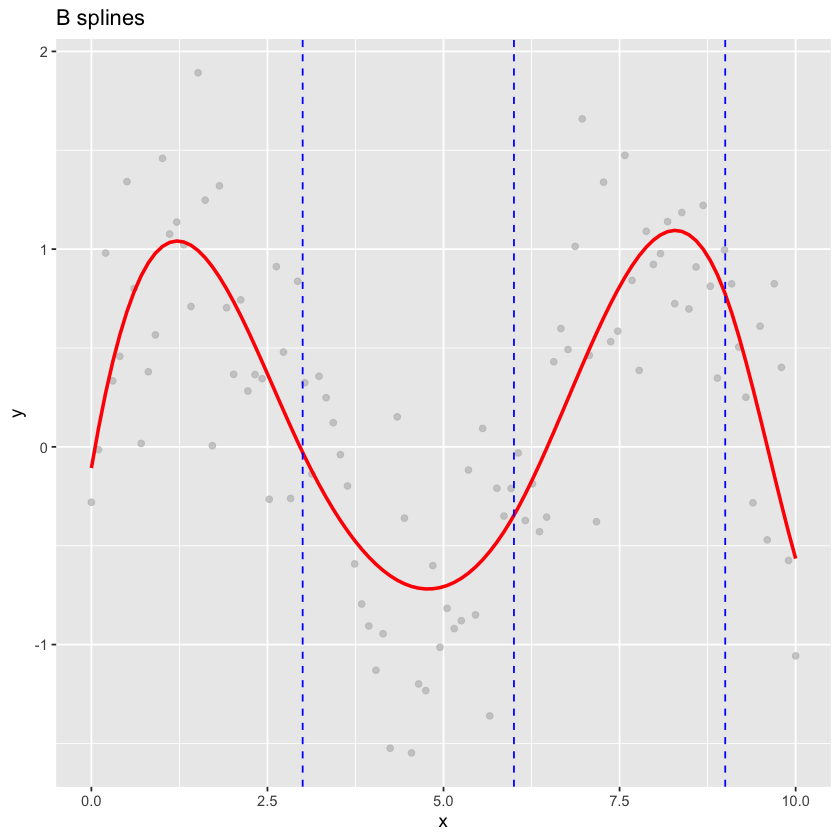

In [24]:
# 预测值
data$pred <- predict(model)

ggplot(data, aes(x, y)) +
geom_point(color = "gray", alpha = 0.7) +
geom_line(aes(y = pred), color = "red", linewidth = 1) +
geom_vline(xintercept = knots, linetype = "dashed", color = "blue") +
labs(title = "B splines", x = "x", y = "y")

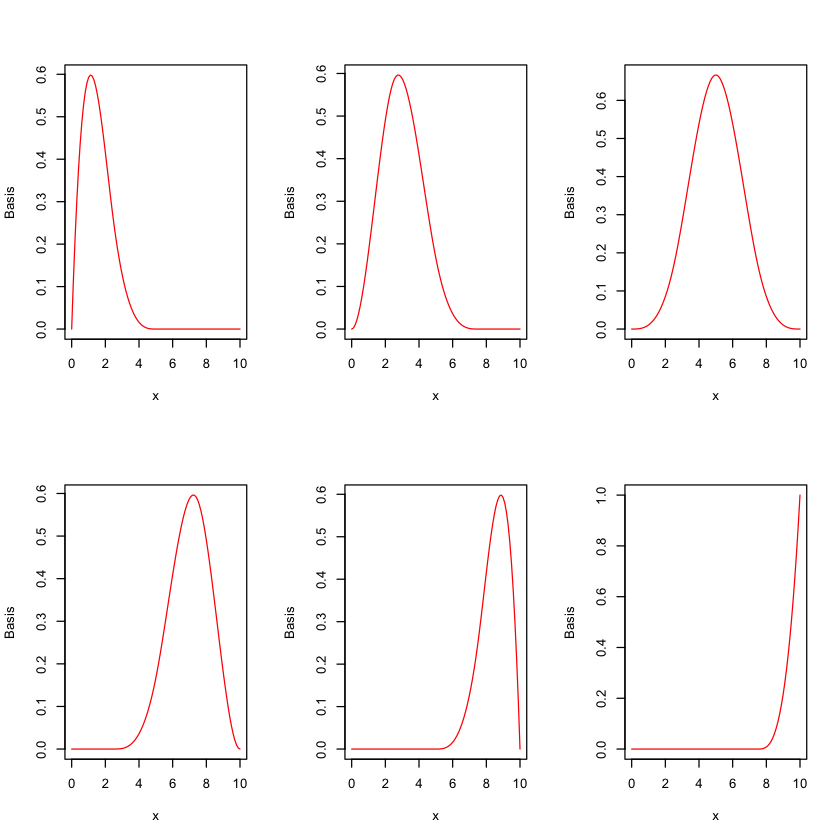

In [23]:
# 绘制出每个B样条基函数，一个函数一张图
par(mfrow = c(2, 3))
for (i in 1:6) {
  plot(data$x, basis_auto[, i], type = "l", col = "red", xlab = "x", ylab = "Basis")
}

# 自然样条

In [25]:
library(splines) # 自然样条基函数
library(ggplot2) # 数据可视化
library(mgcv) # 广义加性模型（自动调参）

In [27]:
set.seed(123)
x <- seq(0, 10, length.out = 100)
y <- sin(x) + 0.5 * rnorm(100)  # 生成含噪声的正弦数据
data <- data.frame(x, y)
data

x,y
<dbl>,<dbl>
0.0000000,-0.280237823
0.1010101,-0.014250324
0.2020202,0.980003014
0.3030303,0.333668000
0.4040404,0.457780480
0.5050505,1.341384134
0.6060606,0.800092210
0.7070707,0.017078896
0.8080808,0.379536136


In [40]:
# 定义节点（如四分位数位置）
knots <- quantile(x, probs = c(0.25, 0.5, 0.75))
# 生成自然样条基矩阵（三次，df = 节点数 + 1）
basis_ns <- ns(data$x, knots = knots)
# 查看基矩阵结构
head(basis_ns)

1,2,3,4
0.000000e+00,0.00000000,0.00000000,0.00000000
1.099317e-05,-0.01023872,0.03071616,-0.02047744
8.794540e-05,-0.02044399,0.06133197,-0.04088798
2.968157e-04,-0.03058237,0.09174711,-0.06116474
7.035632e-04,-0.04062040,0.12186121,-0.08124081
1.374147e-03,-0.05052465,0.15157395,-0.10104930


In [32]:
data

x,y,pred
<dbl>,<dbl>,<dbl>
0.0000000,-0.280237823,-0.10722865
0.1010101,-0.014250324,0.09348437
0.2020202,0.980003014,0.27211433
0.3030303,0.333668000,0.42955810
0.4040404,0.457780480,0.56671254
0.5050505,1.341384134,0.68447455
0.6060606,0.800092210,0.78374099
0.7070707,0.017078896,0.86540874
0.8080808,0.379536136,0.93037467


In [41]:
# 将基矩阵作为预测变量
model <- lm(y ~ basis_ns, data = data)
# 查看模型摘要
summary(model)


Call:
lm(formula = y ~ basis_ns, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16115 -0.30785  0.00018  0.32227  1.09124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.4277     0.1805   2.370   0.0198 *  
basis_ns1    -2.7184     0.2301 -11.816  < 2e-16 ***
basis_ns2     1.4224     0.2285   6.224 1.30e-08 ***
basis_ns3     0.8104     0.4615   1.756   0.0823 .  
basis_ns4    -1.2527     0.2144  -5.842 7.21e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4628 on 95 degrees of freedom
Multiple R-squared:  0.6605,	Adjusted R-squared:  0.6462 
F-statistic:  46.2 on 4 and 95 DF,  p-value: < 2.2e-16


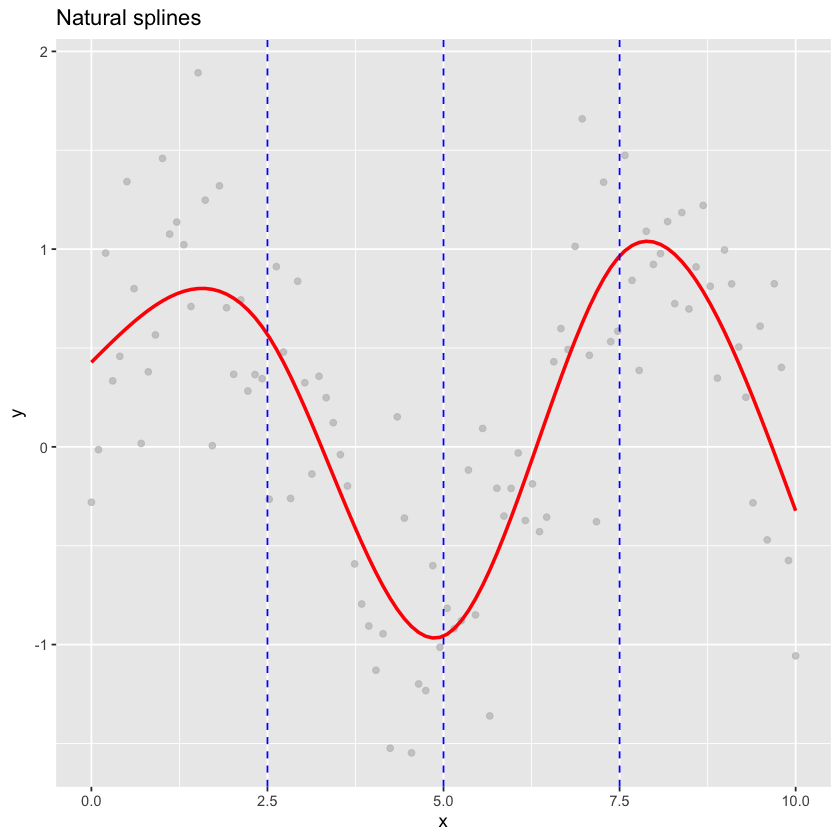

In [42]:
# 预测值
data$pred <- predict(model)

ggplot(data, aes(x, y)) +
geom_point(color = "gray", alpha = 0.7) +
geom_line(aes(y = pred), color = "red", linewidth = 1) +
geom_vline(xintercept = knots, linetype = "dashed", color = "blue") +
labs(title = "Natural splines", x = "x", y = "y")

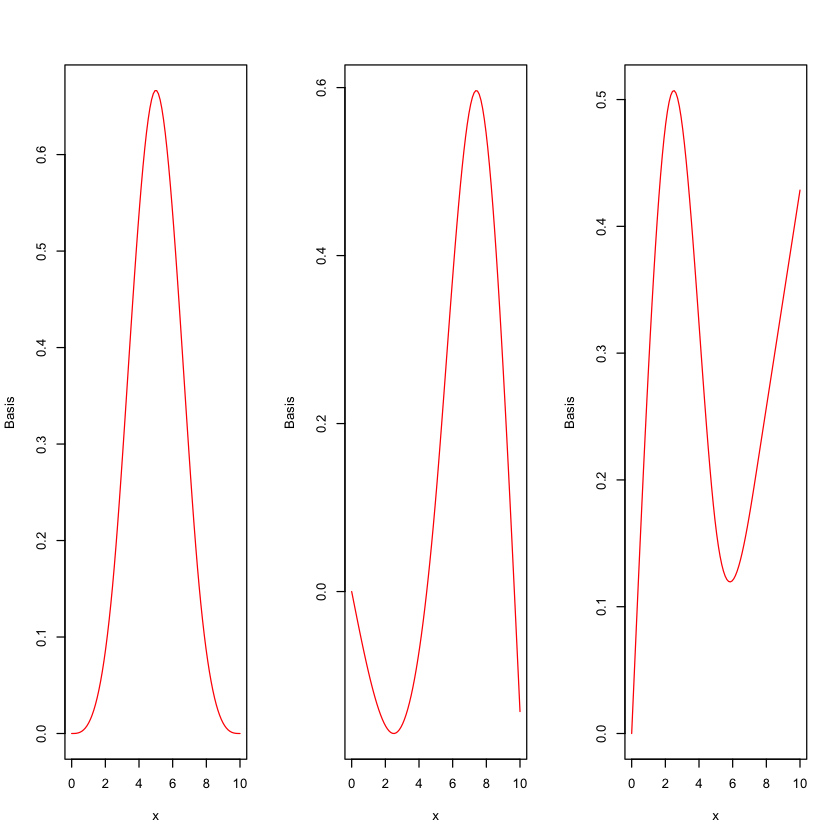

In [36]:
# 绘制出每个自然样条基函数，一个函数一张图
par(mfrow = c(1, 3))
for (i in 1:3) {
  plot(data$x, basis_ns[, i], type = "l", col = "red", xlab = "x", ylab = "Basis")
}

# 平滑样条

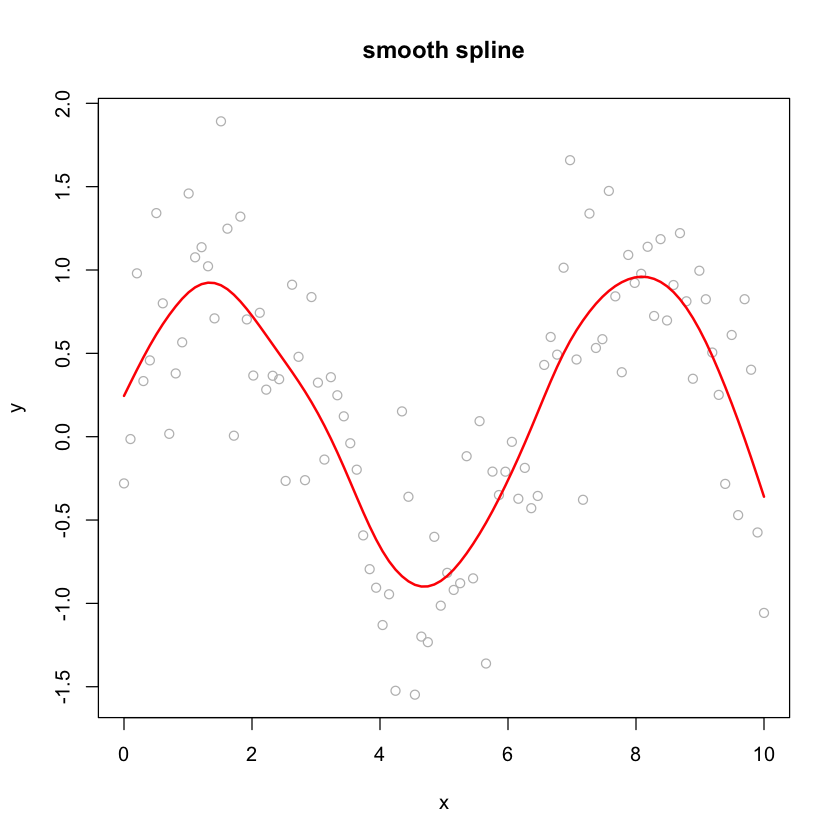

In [45]:
# 生成数据
set.seed(123)
x <- seq(0, 10, length.out = 100)
y <- sin(x) + rnorm(100, sd = 0.5)
data <- data.frame(x, y)

# 拟合平滑样条
fit <- smooth.spline(x, y, cv = TRUE)  # 使用GCV自动选择λ

# 预测与绘图
plot(x, y, col = "gray", main = "smooth spline")
lines(fit, col = "red", lwd = 2)


Family: gaussian 
Link function: identity 

Formula:
y ~ s(x, bs = "tp")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.22440    0.04593   4.886 4.31e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
       edf Ref.df     F p-value    
s(x) 6.566    7.7 23.64  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.652   Deviance explained = 67.5%
GCV = 0.22818  Scale est. = 0.21092   n = 100

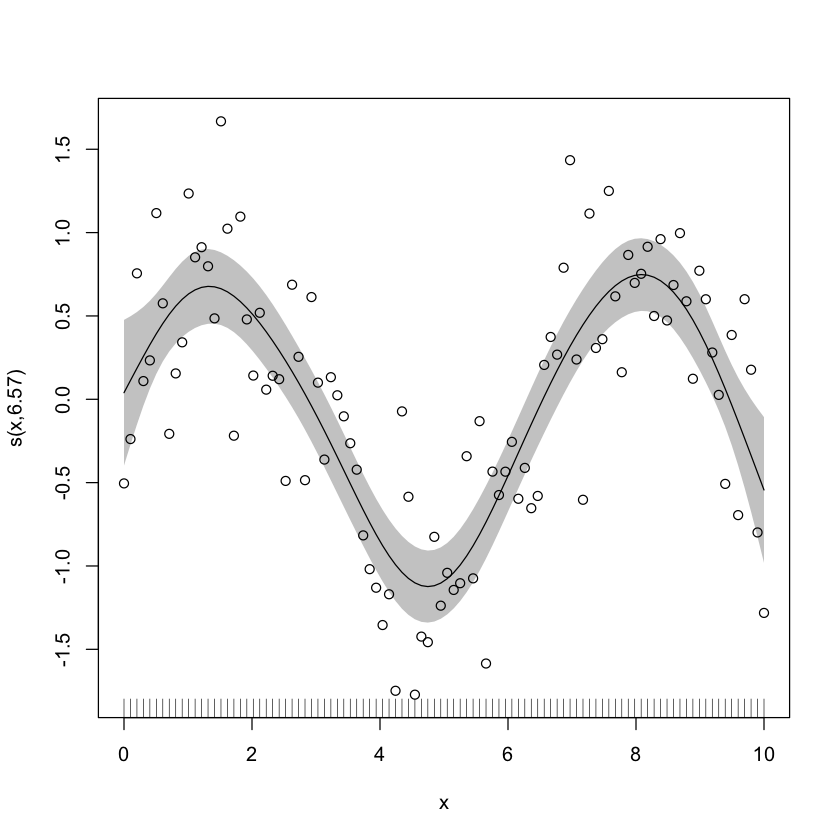

In [46]:
library(mgcv)

# 拟合平滑样条（自动选择λ）
gam_model <- gam(y ~ s(x, bs = "tp"), data = data)  # "tp"表示薄板样条

# 查看模型摘要
summary(gam_model)

# 预测与绘图
plot(gam_model, residuals = TRUE, pch = 1, shade = TRUE)

# 惩罚样条

Loading required package: nlme

This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.




Family: gaussian 
Link function: identity 

Formula:
y ~ s(x, bs = "ps", k = 20)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.22440    0.04577   4.903 4.04e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
       edf Ref.df     F p-value    
s(x) 6.846  8.298 22.23  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.654   Deviance explained = 67.8%
GCV = 0.22734  Scale est. = 0.2095    n = 100

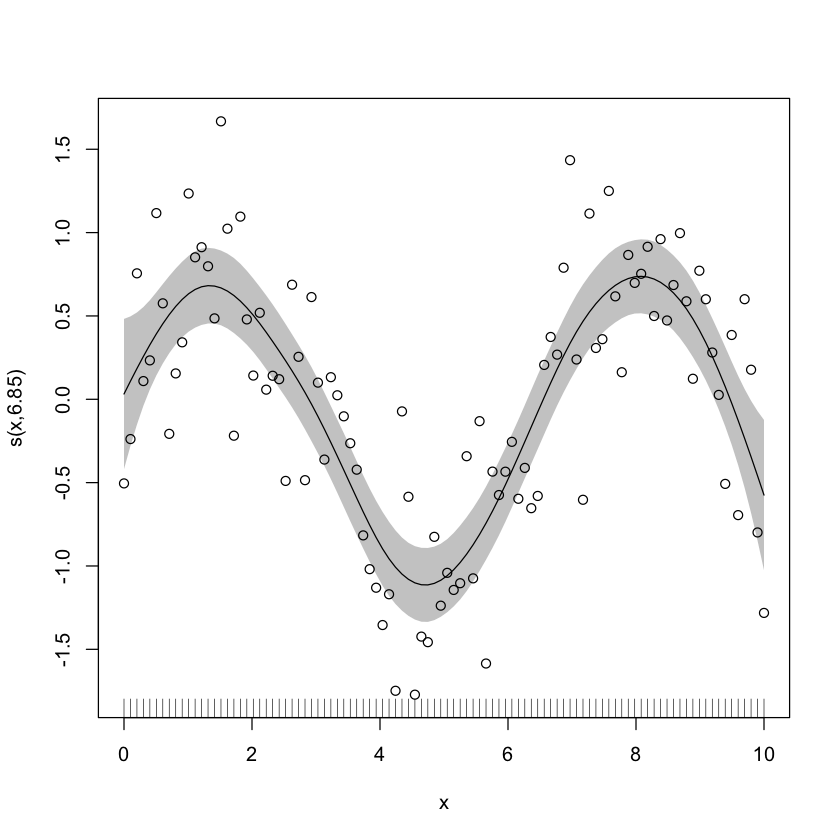

In [1]:
library(mgcv)

# 生成数据
set.seed(123)
x <- seq(0, 10, length.out = 100)
y <- sin(x) + rnorm(100, sd = 0.5)
data <- data.frame(x, y)

# 拟合惩罚样条（自动选择λ）
gam_model <- gam(y ~ s(x, bs = "ps", k = 20), data = data)

# 查看模型摘要
summary(gam_model)

# 可视化拟合效果
plot(gam_model, residuals = TRUE, pch = 1, shade = TRUE)

# RCS实战

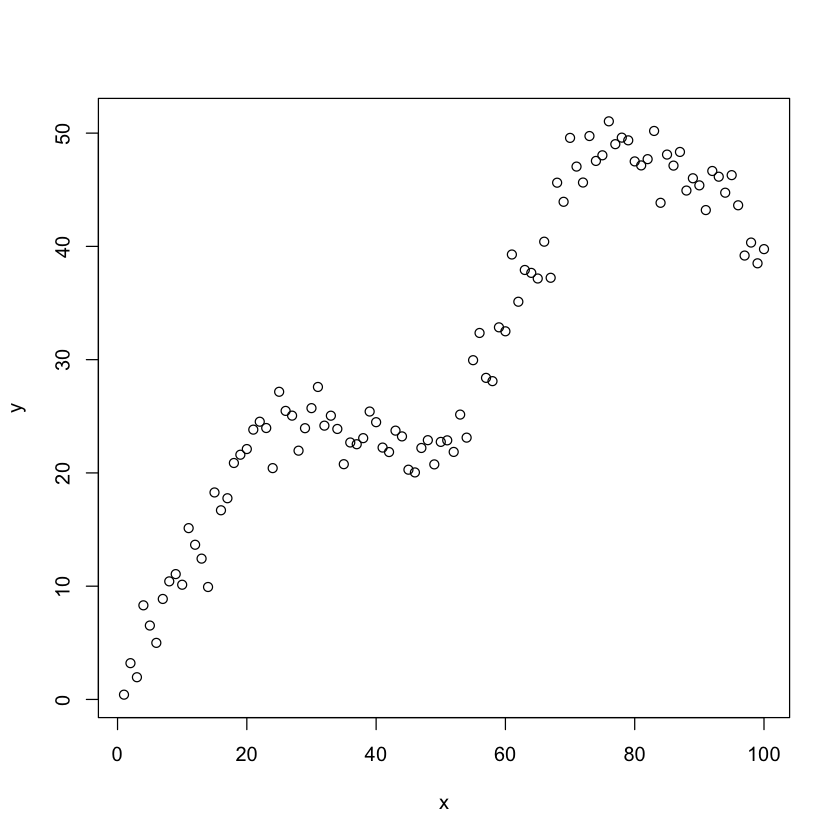

In [2]:
rm(list = ls())
x <- 1:100         
k <- c(25, 50, 75) 
u <- function(x)ifelse(x > 0, x, 0)
x2 <- u(x - k[1])
x3 <- u(x - k[2])
x4 <- u(x - k[3])
set.seed(1)
y <- 0.8 + 1*x + -1.2*x2 + 1.4*x3 + -1.6*x4 + rnorm(100,sd = 2.2)
plot(x, y)

## 线性立方样条

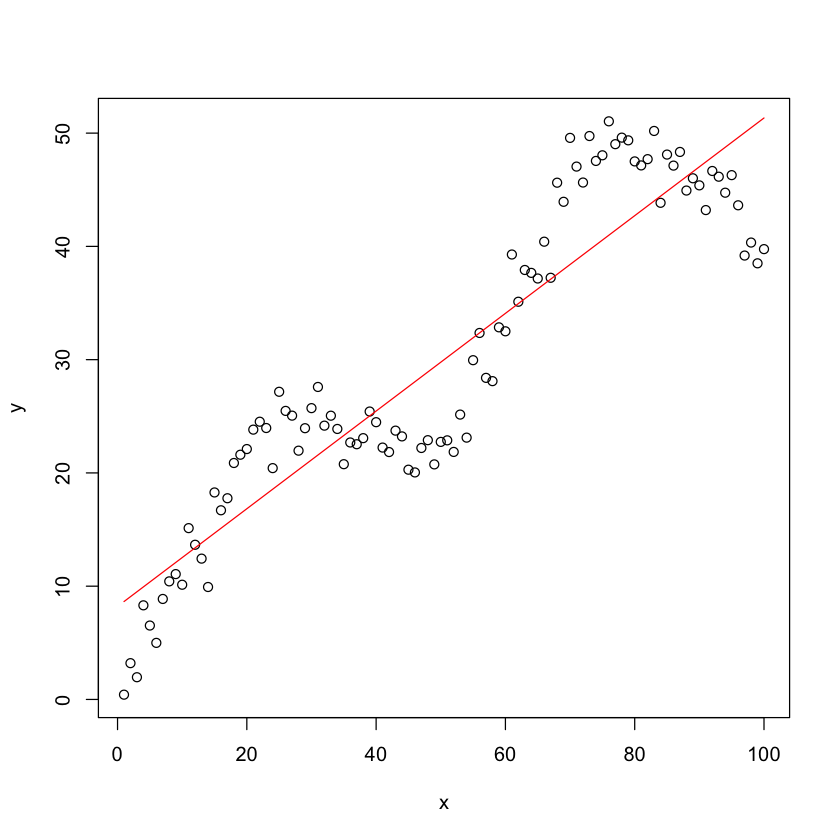

In [3]:
f <- lm(y ~ x)
plot(x, y)
lines(x, fitted(f),col="red")

Loading required package: Hmisc


Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units




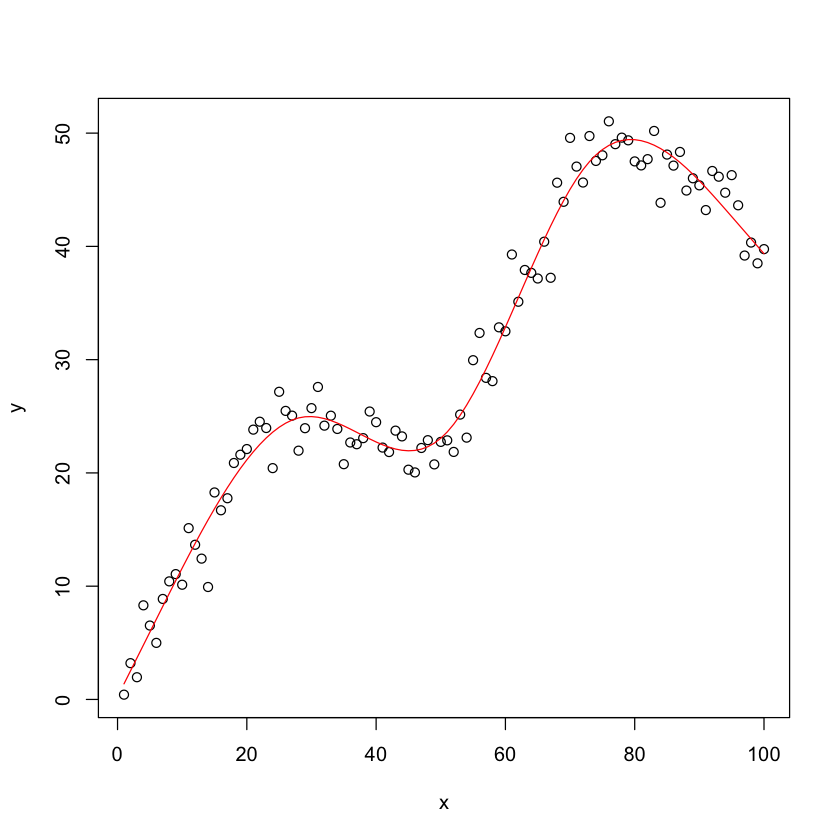

In [4]:
# 加载R包
library(rms)
library(ggplot2)
# 拟合限制性立方样条，这里对变量x使用，跟多项式回归差不多
f <- lm(y ~ rcs(x,5))

# 画出原数据
plot(x,y)
lines(x, fitted(f),col="red") # 画出拟合线

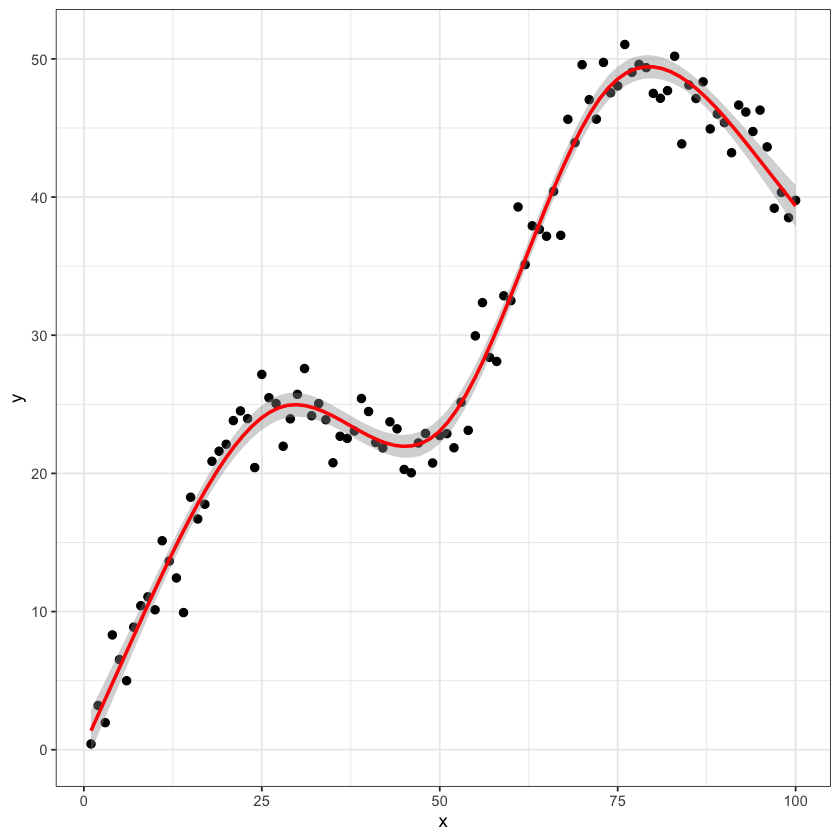

In [5]:
df.tmp <- data.frame(x=x,y=y)

ggplot(df.tmp, aes(x,y))+
  geom_point(size=2)+
  geom_smooth(method = "lm",
              formula = y ~ rcs(x,5),
              se = T,
              color="red"
              )+
  theme_bw()

## 逻辑回归立方样条

In [9]:
library(rms)
# 逻辑回归数据
#getHdata(titanic3) # 在线下载titanic3数据，为了重复使用我已经下载下来了
load(file = "./data/titanic3.rdata")
# 使用rms前先把数据打包
dd <- datadist(titanic3); options(datadist='dd')

In [10]:
dd

                pclass survived                        name    sex        age
Low:effect        <NA>        0                        <NA>   <NA> 21.0000000
Adjust to          3rd        0        Connolly, Miss. Kate   male 28.0000000
High:effect       <NA>        1                        <NA>   <NA> 39.0000000
Low:prediction     1st        0         Abbing, Mr. Anthony female  0.9159027
High:prediction    3rd        1 van Melkebeke, Mr. Philemon   male 65.0095602
Low                1st        0         Abbing, Mr. Anthony female  0.1667000
High               3rd        1 van Melkebeke, Mr. Philemon   male 80.0000000
                sibsp parch    ticket     fare cabin    embarked boat
Low:effect          0     0      <NA>   7.8958  <NA>        <NA> <NA>
Adjust to           0     0  CA. 2343  14.4542       Southampton     
High:effect         1     9      <NA>  31.2750  <NA>        <NA> <NA>
Low:prediction      0     0    110152   0.0000         Cherbourg     
High:prediction     5     

In [11]:
# 逻辑回归的立方样条
fit <- lrm(survived ~ rcs(sqrt(age),5) + sex, data=titanic3)
fit

Frequencies of Missing Values Due to Each Variable
survived      age      sex 
       0      263        0 

Logistic Regression Model

lrm(formula = survived ~ rcs(sqrt(age), 5) + sex, data = titanic3)


                       Model Likelihood      Discrimination    Rank Discrim.    
                             Ratio Test             Indexes          Indexes    
Obs          1046    LR chi2     328.06      R2       0.363    C       0.794    
 0            619    d.f.             5     R2(5,1046)0.266    Dxy     0.588    
 1            427    Pr(> chi2) <0.0001    R2(5,758.1)0.347    gamma   0.592    
max |deriv| 2e-07                            Brier    0.168    tau-a   0.284    

          Coef     S.E.    Wald Z Pr(>|Z|)
Intercept   3.0936  0.5428   5.70 <0.0001 
age        -0.6383  0.1771  -3.60 0.0003  
age'        1.5544  0.6527   2.38 0.0172  
age''     -12.1583  8.8925  -1.37 0.1715  
age'''     15.8326 16.9397   0.93 0.3500  
sex=male   -2.4944  0.1549 -16.10 <0.0001 


In [12]:
anova(fit)

,Chi-Square,d.f.,P
age,14.96568,4,0.004772938
Nonlinear,12.65292,3,0.005450583
sex,259.17244,1,0.000000000
TOTAL,265.87572,5,0.000000000


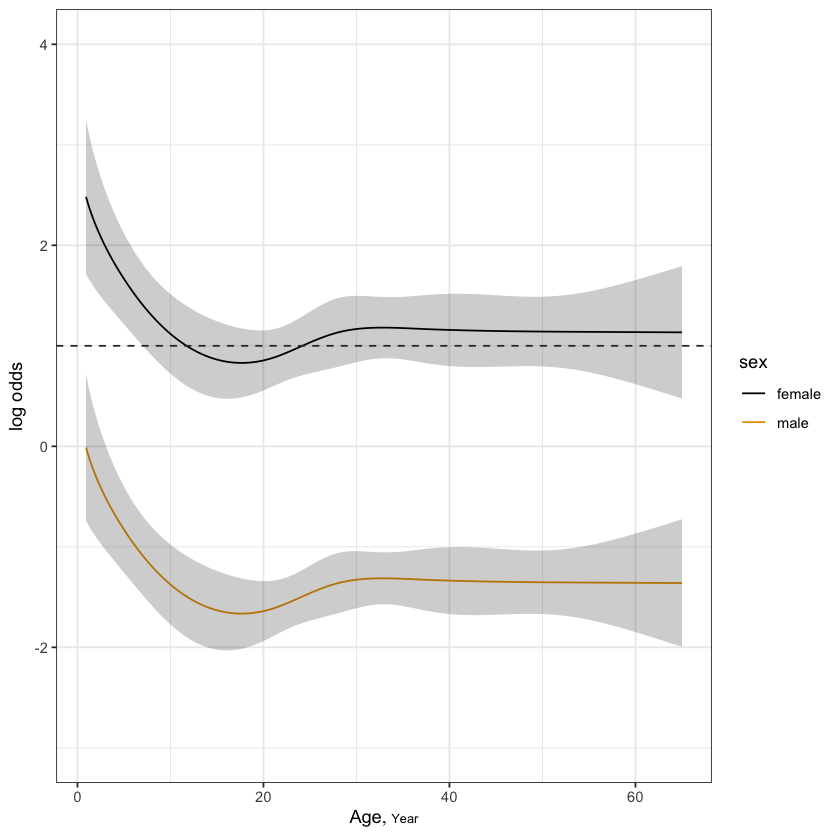

In [14]:
ggplot(Predict(fit, age, sex))+ # 加上 fun = plogis 则返回概率
  geom_hline(yintercept = 1, color="grey20",linetype=2)+ # OR=1的横线
  theme_bw() 

## Cox回归的立方样条

In [15]:
rm(list = ls())
# 构造数据，包括性别(sex),年龄(age),生存时间(time),生存结局(death)
n <- 1000
set.seed(731)
age <- 50 + 12*rnorm(n)
label(age) <- "Age"
sex <- factor(sample(c('Male','Female'), n, rep=TRUE, prob=c(.6, .4)))
cens <- 15*runif(n)
h <- .02*exp(.04*(age-50)+.8*(sex=='Female'))
time<- -log(runif(n))/h
label(time) <- 'Follow-up Time'
death<- ifelse(time <= cens,1,0)
time <- pmin(time, cens)
units(time) <- "Year"
data<-data.frame(age,sex,time,death)
psych::headTail(data)

,age,sex,time,death
,<labelled>,<fct>,<labelled>,<chr>
1,60.58,Male,3.09,1
2,42.11,Male,1.57,0
3,54.87,Male,3.24,0
4,55.82,Male,12.5,0
...,...,NA,...,...
997,53.02,Female,9.03,0
998,38.25,Male,11.72,0
999,45.63,Male,12.8,0
1000,57.38,Female,3.4,0


In [16]:
# 打包数据
dd <- datadist(data);options(datadist='dd') 

# 拟合cox模型
fit<- cph(Surv(time,death) ~ rcs(age,4) + sex,data = data) 
fit

Cox Proportional Hazards Model

cph(formula = Surv(time, death) ~ rcs(age, 4) + sex, data = data)

                        Model Tests     Discrimination    
                                               Indexes    
Obs       1000    LR chi2     78.28     R2       0.083    
Events     183    d.f.            4    R2(4,1000)0.072    
Center -0.2861    Pr(> chi2) 0.0000     R2(4,183)0.334    
                  Score chi2  83.86     Dxy      0.378    
                  Pr(> chi2) 0.0000                       

         Coef    S.E.   Wald Z Pr(>|Z|)
age      -0.0173 0.0286 -0.61  0.5443  
age'      0.2040 0.0767  2.66  0.0079  
age''    -0.7500 0.2679 -2.80  0.0051  
sex=Male -0.6445 0.1488 -4.33  <0.0001 


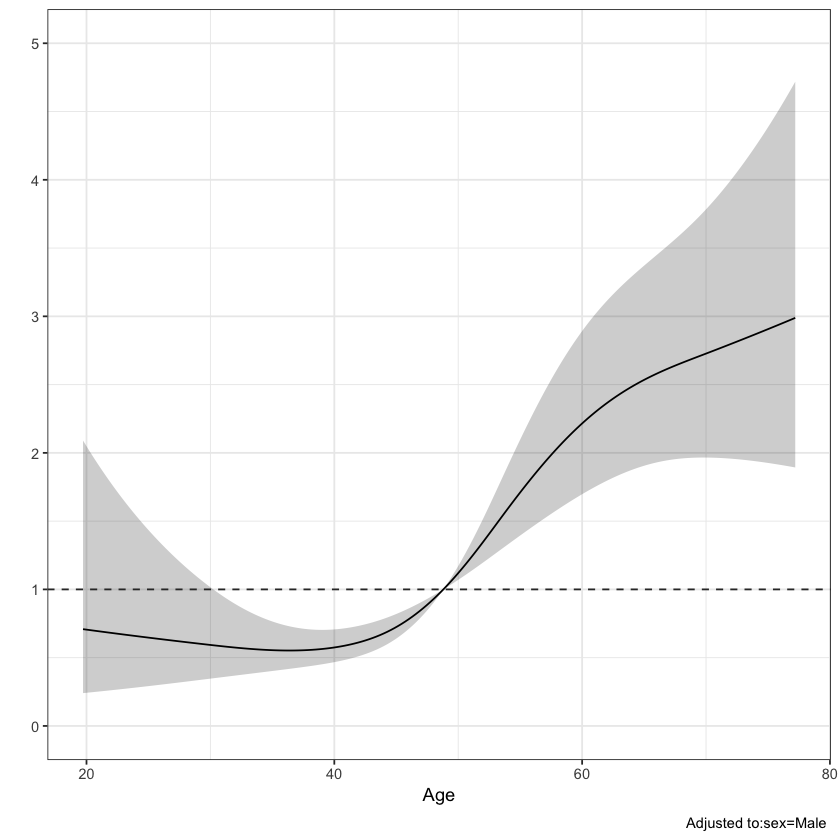

In [18]:
ggplot(Predict(fit, age,fun = exp, ref.zero = T))+ # fun = exp，计算HR值，不加这句计算概率
  geom_hline(yintercept = 1, color="grey20",linetype=2)+ # HR=1的横线
  theme_bw()

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


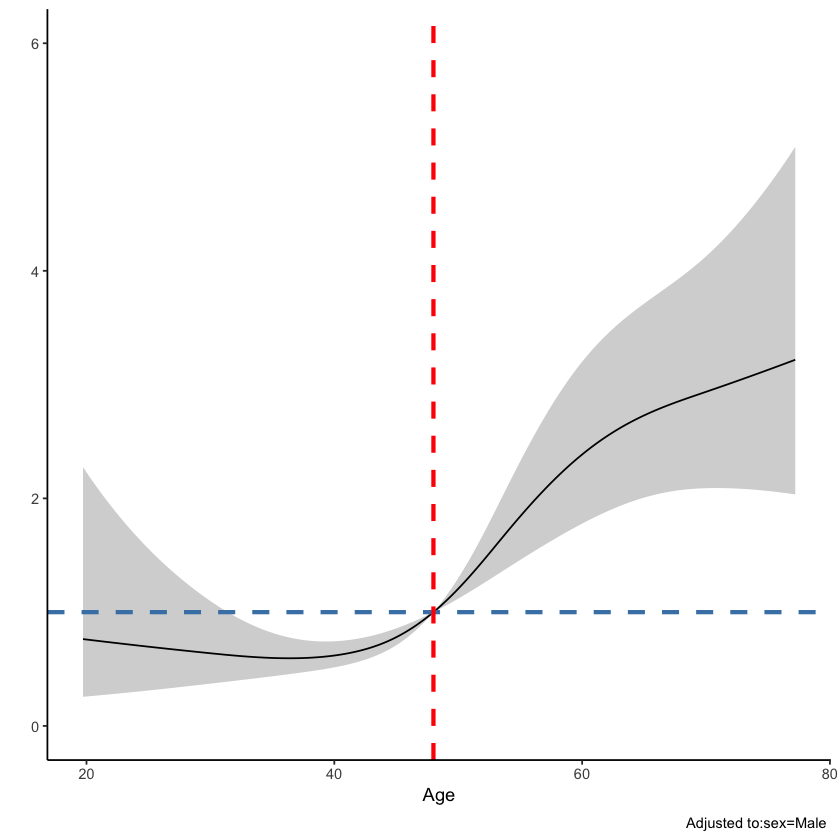

In [19]:
dd$limits$age[2] <- 48 # 重新选择HR为1的点
fit <- update(fit) # 更新模型

# 重新画图
ggplot(Predict(fit, age,fun = exp, ref.zero = T))+ 
  geom_hline(yintercept = 1, color="steelblue",linetype=2,size=1.2)+ # HR=1的横线
  geom_vline(xintercept = 48, color="red",linetype=2,size=1.2)+
  theme_classic()
## Warning: Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
## ℹ Please use `linewidth` instead.